<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/7_1_Apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply
* apply() 함수를 통해서 dataframe에 함수를 적용할 수 있습니다

In [ ]:
# 가상의 성적 데이터를 만들어보겠습니다
import pandas as pd
import numpy as np

data = np.random.choice(range(60,101), (10,3), replace=True)

In [ ]:
data

array([[93, 96, 83],
       [94, 78, 64],
       [89, 79, 75],
       [62, 77, 62],
       [70, 87, 72],
       [94, 86, 76],
       [64, 86, 80],
       [69, 66, 68],
       [83, 94, 95],
       [82, 98, 80]])

In [ ]:
df=pd.DataFrame(data,columns = ['파이썬', '머신러닝', '딥러닝'])

In [ ]:
df

파이썬  머신러닝  딥러닝
0   93    96   83
1   94    78   64
2   89    79   75
3   62    77   62
4   70    87   72
5   94    86   76
6   64    86   80
7   69    66   68
8   83    94   95
9   82    98   80

In [ ]:
# 평균을 추가해봅시다
df=df.assign(평균 = (df.파이썬 + df.머신러닝 + df.딥러닝)/3)
df

파이썬  머신러닝  딥러닝         평균
0   93    96   83  90.666667
1   94    78   64  78.666667
2   89    79   75  81.000000
3   62    77   62  67.000000
4   70    87   72  76.333333
5   94    86   76  85.333333
6   64    86   80  76.666667
7   69    66   68  67.666667
8   83    94   95  90.666667
9   82    98   80  86.666667

In [ ]:
# 90점 이상은 A, 80점 이상B, 70점 이상 C, 그 이하는 D를 성적 컬럼에 추가하고 싶은 경우

In [ ]:
def grade(점수):
    if 점수>=90: return 'A'
    elif 점수>=80: return 'B'
    elif 점수>=70: return 'C'
    else: return 'D'    

In [ ]:
grade(70)

'C'

In [ ]:
df['성적'] = df.평균.apply(grade)

In [ ]:
df.head()

파이썬  머신러닝  딥러닝         평균 성적
0   93    96   83  90.666667  A
1   94    78   64  78.666667  C
2   89    79   75  81.000000  B
3   62    77   62  67.000000  D
4   70    87   72  76.333333  C

In [ ]:
df.query('성적=="B"')

파이썬  머신러닝  딥러닝         평균 성적
2   89    79   75  81.000000  B
5   94    86   76  85.333333  B
9   82    98   80  86.666667  B

* 여러 컬럼을 입력으로 계산하는 경우

In [ ]:
def count_point(class1, class2, class3, point):
    cnt = 0
    if class1>=point: cnt +=1
    if class2>=point: cnt +=1
    if class3>=point: cnt +=1
    return cnt

In [ ]:
count_point(90, 80,70, 80)

2

In [ ]:
point = 80
df['과목수'] = df.apply(lambda row: count_point(row.파이썬, row.머신러닝, row.딥러닝, point), axis = 1) # axis=1이 각 행에 함수 적용됨
df=df.rename(columns={'과목수':str(point)+'이상과목수'})

In [ ]:
df

파이썬  머신러닝  딥러닝         평균 성적  80이상과목수
0   93    96   83  90.666667  A        3
1   94    78   64  78.666667  C        1
2   89    79   75  81.000000  B        1
3   62    77   62  67.000000  D        0
4   70    87   72  76.333333  C        1
5   94    86   76  85.333333  B        2
6   64    86   80  76.666667  C        2
7   69    66   68  67.666667  D        0
8   83    94   95  90.666667  A        3
9   82    98   80  86.666667  B        3

In [ ]:
df.iloc[:,-1].max()

3

Lambda expression


*   간단한 함수의 경우, lambda expression을 통해 간단히 함수로 만들 수 있다.


In [ ]:
# x*2 - x +1을 함수로 만들때

import numpy as np
x = np.linspace(-1,1, num=100)

def y(x):
  return x**2 -x +1

  

In [ ]:
y(3)

7

In [ ]:
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [ ]:
y(x)

array([3.        , 2.93980206, 2.88042037, 2.82185491, 2.7641057 ,
       2.70717274, 2.65105601, 2.59575554, 2.5412713 , 2.48760331,
       2.43475156, 2.38271605, 2.33149679, 2.28109377, 2.23150699,
       2.18273646, 2.13478217, 2.08764412, 2.04132231, 1.99581675,
       1.95112744, 1.90725436, 1.86419753, 1.82195694, 1.7805326 ,
       1.7399245 , 1.70013264, 1.66115702, 1.62299765, 1.58565453,
       1.54912764, 1.513417  , 1.4785226 , 1.44444444, 1.41118253,
       1.37873686, 1.34710744, 1.31629426, 1.28629732, 1.25711662,
       1.22875217, 1.20120396, 1.17447199, 1.14855627, 1.12345679,
       1.09917355, 1.07570656, 1.05305581, 1.0312213 , 1.01020304,
       0.99000102, 0.97061524, 0.95204571, 0.93429242, 0.91735537,
       0.90123457, 0.88593001, 0.87144169, 0.85776962, 0.84491378,
       0.8328742 , 0.82165085, 0.81124375, 0.80165289, 0.79287828,
       0.78491991, 0.77777778, 0.77145189, 0.76594225, 0.76124885,
       0.7573717 , 0.75431078, 0.75206612, 0.75063769, 0.75002

In [ ]:
# lambda expression
import numpy as np
x = np.linspace(-1,1, num=100)
y = lambda x: x**2 -x +1
y(x)

array([3.        , 2.93980206, 2.88042037, 2.82185491, 2.7641057 ,
       2.70717274, 2.65105601, 2.59575554, 2.5412713 , 2.48760331,
       2.43475156, 2.38271605, 2.33149679, 2.28109377, 2.23150699,
       2.18273646, 2.13478217, 2.08764412, 2.04132231, 1.99581675,
       1.95112744, 1.90725436, 1.86419753, 1.82195694, 1.7805326 ,
       1.7399245 , 1.70013264, 1.66115702, 1.62299765, 1.58565453,
       1.54912764, 1.513417  , 1.4785226 , 1.44444444, 1.41118253,
       1.37873686, 1.34710744, 1.31629426, 1.28629732, 1.25711662,
       1.22875217, 1.20120396, 1.17447199, 1.14855627, 1.12345679,
       1.09917355, 1.07570656, 1.05305581, 1.0312213 , 1.01020304,
       0.99000102, 0.97061524, 0.95204571, 0.93429242, 0.91735537,
       0.90123457, 0.88593001, 0.87144169, 0.85776962, 0.84491378,
       0.8328742 , 0.82165085, 0.81124375, 0.80165289, 0.79287828,
       0.78491991, 0.77777778, 0.77145189, 0.76594225, 0.76124885,
       0.7573717 , 0.75431078, 0.75206612, 0.75063769, 0.75002

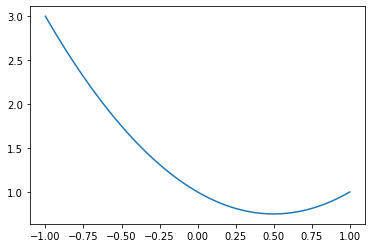

In [ ]:
# 차트
import seaborn as sns
sns.lineplot(x, y(x))